## Network Science Assignment 7 (HS22)




David Diener 19-733-179

Rafael Dubach 18-755-180

In [1]:
import math as m
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from typing import Tuple, List
import seaborn as sns
from numpy.typing import ArrayLike

from networkx.algorithms.tree.mst import minimum_spanning_tree

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# A07.1 - Correlation MSTs
Task: Build MSTs from correlations and analyze them 
+ from the correlation matrices, build the Minimum Spanning Trees (see lecture)
+ assign the correct ticker (’AAPL’, ’AMZN’, ...) as an attribute to the nodes and calculate the degrees
+ compare the MST degree distributions of the 1 hour, 1 minute,
Normal and One-Factor correlations

In [52]:
cormat_h = np.load("/content/drive/MyDrive/Colab Notebooks/Exercise_7/cormat_1h.npy")
cormat_m = np.load("/content/drive/MyDrive/Colab Notebooks/Exercise_7/cormat_1m.npy")
onefactor_h = np.load("/content/drive/MyDrive/Colab Notebooks/Exercise_7/cormat_onefactor_1h.npy")
onefactor_m = np.load("/content/drive/MyDrive/Colab Notebooks/Exercise_7/cormat_onefactor_1m.npy")
gaussian_h = np.load("/content/drive/MyDrive/Colab Notebooks/Exercise_7/cormat_gaussian_1h.npy")
gaussian_m = np.load("/content/drive/MyDrive/Colab Notebooks/Exercise_7/cormat_gaussian_1m.npy")

with open("/content/drive/MyDrive/Colab Notebooks/Exercise_7/stocknames.txt", "r") as f:
      stocknames = [name.replace("\n","") for name in f.readlines()]

In [56]:
def min_spanning_tree(data, labels):
    distance = np.sqrt(2*(1-data))
    distance = np.nan_to_num(distance)
    graph = nx.from_numpy_array(distance)
    mst = minimum_spanning_tree(graph,weight="weight")
    labels = {i:labels[i] for i in range(len(labels))}
    nx.set_node_attributes(mst, values=labels, name="name")
    return mst

#comrat
cormat_minspant_m=min_spanning_tree(cormat_m,stocknames)
cormat_minspant_h=min_spanning_tree(cormat_h,stocknames)
#onefactor
onefactor_minspant_m=min_spanning_tree(onefactor_m,stocknames)
onefactor_minspant_h=min_spanning_tree(onefactor_h,stocknames)

gaussian_minspant_m=min_spanning_tree(gaussian_m,stocknames)
gaussian_minspant_h=min_spanning_tree(gaussian_m,stocknames)

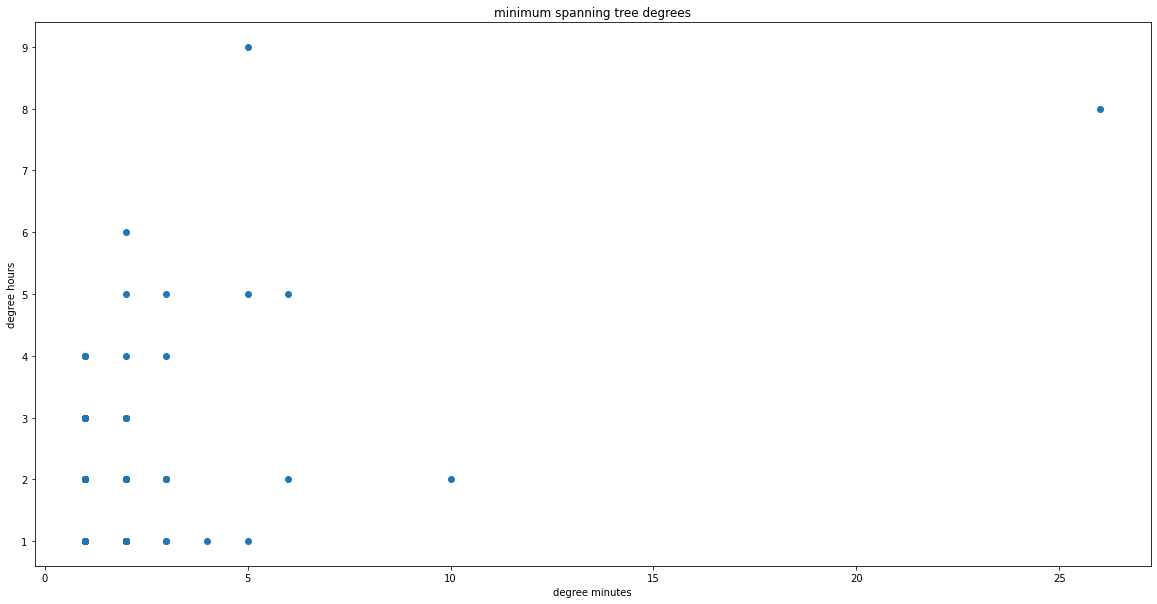

In [14]:
degrees_min = nx.degree(cormat_minspant_m)
degrees_min = [i[1] for i in degrees_min]
degrees_hour = nx.degree(cormat_minspant_h)
degrees_hour = [i[1] for i in degrees_hour]
fig,ax = plt.subplots(figsize=(20,10))
ax.scatter(degrees_min,degrees_hour)

plt.title("minimum spanning tree degrees")
plt.xlabel("degree minutes")
plt.ylabel("degree hours")
plt.show()

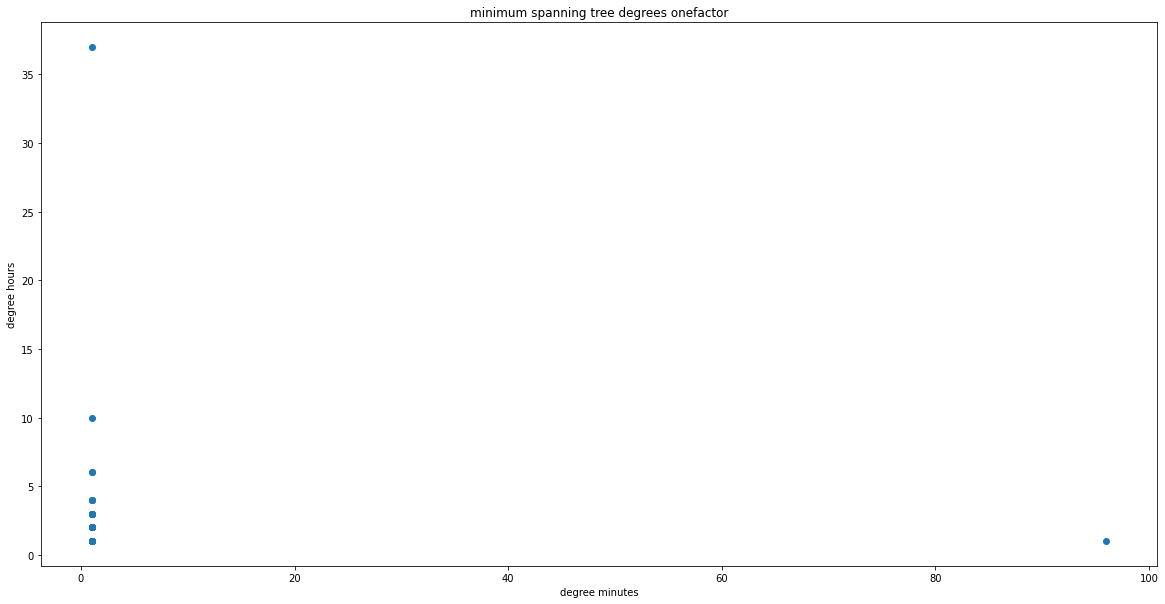

In [33]:
degrees_min = nx.degree(onefactor_minspant_m)
degrees_min = [i[1] for i in degrees_min]
degrees_hour = nx.degree(onefactor_minspant_h)
degrees_hour = [i[1] for i in degrees_hour]
fig,ax = plt.subplots(figsize=(20,10))
ax.scatter(degrees_min,degrees_hour)

plt.title("minimum spanning tree degrees onefactor")
plt.xlabel("degree minutes")
plt.ylabel("degree hours")
plt.show()

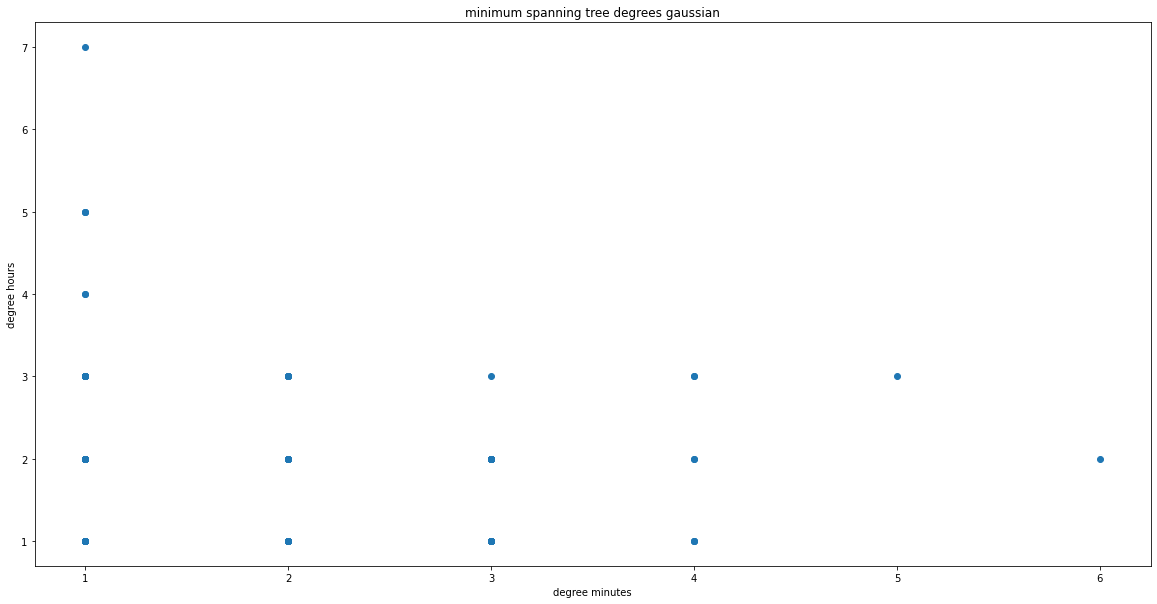

In [58]:
mst_m = min_spanning_tree(gaussian_h, stocknames) 
mst_m_degree = [degree[1] for degree in nx.degree(mst_m)]
mst_h = min_spanning_tree(gaussian_m, stocknames)
mst_h_degree = [degree[1] for degree in nx.degree(mst_h)]

fig,ax = plt.subplots(figsize=(20,10))
ax.scatter(mst_m_degree,mst_h_degree)

plt.title("minimum spanning tree degrees gaussian")
plt.xlabel("degree minutes")
plt.ylabel("degree hours")
plt.show()

# A07.2 - Conclusions
Task: finish the analysis by drawing conclusions
Answer the following questions (for both timescales):

## 1. Is there a‘market mode’?
+ Yes there is a market mode. Although it's hard to really see it in the graph. While you see the normalized gaps below and also the largest & second largest eigenvalues, it becomes clear that there is a market mode in all of them. 

In [35]:
def f(m,h):
  # Cormat
  eigenval_1m, eigenvec_1m = np.linalg.eig(m)
  eigenval_1h, eigenvec_1h = np.linalg.eig(h)

  l_eig_value_m = sorted([el for el in eigenval_1m], reverse=True)
  l_eig_value_h = sorted([el for el in eigenval_1h], reverse=True)
  gap_m=((l_eig_value_m[0]-l_eig_value_m[1])/l_eig_value_m[1])
  gap_h=((l_eig_value_h[0]-l_eig_value_h[1])/l_eig_value_h[1])

  print("Normalized Market mode gaps 1m = ", gap_m)
  print("Normalized Market mode gaps 1h = ", gap_h)
  print("Market mode largest to second largest 1m = ", l_eig_value_m[0], l_eig_value_m[1])
  print("Market mode largest to second largest 1h = ", l_eig_value_h[0], l_eig_value_h[1])
  #print(l_eig_value_m)
  #print(l_eig_value_h)
print("\nCormat")
f(cormat_m, cormat_h)
print("\nOnefactor")
f(onefactor_m, onefactor_h)
print("\nGaussian")
f(gaussian_m, gaussian_h)


Cormat
Normalized Market mode gaps 1m =  8.84189313897145
Normalized Market mode gaps 1h =  4.074361813227406
Market mode largest to second largest 1m =  30.159679989499068 3.064418558871995
Market mode largest to second largest 1h =  31.027835738491536 6.11462817996361

Onefactor
Normalized Market mode gaps 1m =  20.575279848163603
Normalized Market mode gaps 1h =  11.707863159389275
Market mode largest to second largest 1m =  21.318227400071393 0.9880857884624802
Market mode largest to second largest 1h =  22.518565425931246 1.7720182491336696

Gaussian
Normalized Market mode gaps 1m =  0.012248224654110544
Normalized Market mode gaps 1h =  0.044996390338283565
Market mode largest to second largest 1m =  1.143542012222037 1.1297051299969334
Market mode largest to second largest 1h =  2.23123938979677 2.1351646861425797


## 2. Which is the stock that has the strongest relation with the market?
+ Cormat HON
+ Onefactor: HON/MMM
+ Gaussian: JNJ/HAL

In [36]:
#hours
def f(m,h):
  eigenval_1m, eigenvec_1m = np.linalg.eig(m)
  eigenval_1h, eigenvec_1h = np.linalg.eig(h)

  eigenvector_m = np.abs(eigenvec_1m)
  eigenvector_h = np.abs(eigenvec_1h)

  largest_eigen_m = np.argmax(eigenval_1m)
  largest_eigen_h = np.argmax(eigenval_1h)

  eigenvector_m[:,largest_eigen_m]
  eigenvector_h[:,largest_eigen_h]

  largest_vector_m = np.argmax(eigenvector_m[:,largest_eigen_m])
  largest_vector_h = np.argmax(eigenvector_h[:,largest_eigen_h])

  min = stocknames[largest_vector_m]
  hou = stocknames[largest_vector_h]

  print(f"Stock with strongest relation for minutes: {min}")
  print(f"Stock with strongest relation for hours:   {hou}")


print("\nCormat")
f(cormat_m, cormat_h)
print("\nOnefactor")
f(onefactor_m, onefactor_h)
print("\nGaussian")
f(gaussian_m, gaussian_h)


Cormat
Stock with strongest relation for minutes: HON
Stock with strongest relation for hours:   HON

Onefactor
Stock with strongest relation for minutes: HON
Stock with strongest relation for hours:   MMM

Gaussian
Stock with strongest relation for minutes: JNJ
Stock with strongest relation for hours:   HAL


## 3. Which are the 5 stocks with highest degree on the MST?
+ The highest degree stocks on the MST are:
HOURS / MINUTES

In [59]:
def f(m):
  degrees = sorted(m.degree(),key=lambda x: x[1], reverse=True)[:5]
  nodes = [i[0] for i in degrees]
  ans = {i:m.nodes[i]["name"] for i in nodes}
  print(list(ans.values()))
  #print(list(ans.items()))
  #for i in ans:
      #print("-",m.nodes[i]["name"])

print("\nCormat Minutes")
f(cormat_minspant_m)
print("\nOnefactor Minutes")
f(onefactor_minspant_m)
print("\nGaussian Minutes")
f(gaussian_minspant_m)


Cormat Minutes
['HON', 'EMR', 'COP', 'JPM', 'COF']

Onefactor Minutes
['HON', 'AAPL', 'ABBV', 'ABT', 'ACN']

Gaussian Minutes
['JPM', 'APC', 'BIIB', 'UPS', 'ACN']


In [60]:
def f(h):
  degrees = sorted(h.degree(),key=lambda x: x[1], reverse=True)[:5]
  nodes = [i[0] for i in degrees]
  ans = {i:h.nodes[i]["name"] for i in nodes}
  print(list(ans.values()))
  #for i in ans:
      #print("-",h.nodes[i]["name"])

print("\nCormat Hours")
f(cormat_minspant_h)
print("\nOnefactor Hours")
f(onefactor_minspant_h)
print("\nGaussian Hours")
f(gaussian_minspant_h)


Cormat Hours
['DIS', 'HON', 'GOOG', 'GD', 'JNJ']

Onefactor Hours
['MMM', 'GE', 'DIS', 'HPQ', 'GOOG']

Gaussian Hours
['JPM', 'APC', 'BIIB', 'UPS', 'ACN']


## 4. Is the degree distribution of MSTs qualitatively the same at 1 minute and 1 hour?
+ Yes it pretty much is, depends on your level of qualitycontrol, in our intepretation its sufficient. 

In [40]:
import warnings
def p(m,h):
  warnings.filterwarnings("ignore")
  sns.distplot([m.degree(n) for n in m.nodes()],label="min", color="red")
  sns.distplot([h.degree(n) for n in h.nodes()],label="hour",color="blue")
  plt.legend()
  plt.show()

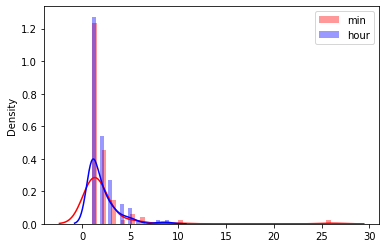

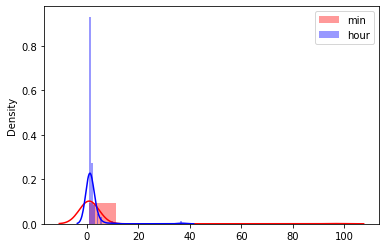

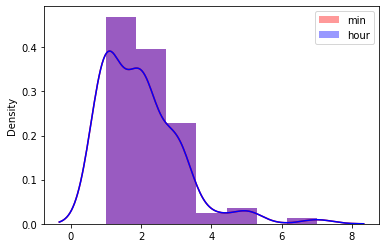

In [41]:
p(cormat_minspant_m,cormat_minspant_h)
p(onefactor_minspant_m,onefactor_minspant_h)
p(gaussian_minspant_m,gaussian_minspant_h)